In [1]:
import pandas as pd
import json
from typing import List
import matplotlib.pyplot as plt

In [2]:
DS_FILEPATH = "data_scientist_data.csv"
MLE_FILEPATH = "machine_learning_data.csv"
# PYTHON_FILEPATH = "python_data.csv"
FILEPATHS = [DS_FILEPATH, MLE_FILEPATH]#,PYTHON_FILEPATH]

SEED = 42

In [3]:
def read_file(path:str)->List:
    data = []

    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            data.append(json.loads(line))
    return data

In [4]:
data = []

for path in FILEPATHS:
    data += read_file(path)

In [5]:
len(data)

511

In [6]:
df = pd.DataFrame(data)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   search_term       511 non-null    object
 1   company           511 non-null    object
 2   position          511 non-null    object
 3   address           511 non-null    object
 4   employment_type   511 non-null    object
 5   seniority         511 non-null    object
 6   min_experience    511 non-null    object
 7   job_category      511 non-null    object
 8   salary            511 non-null    object
 9   num_applications  511 non-null    object
 10  last_posted_date  511 non-null    object
 11  expiry_date       511 non-null    object
 12  JD                511 non-null    object
 13  url               511 non-null    object
dtypes: object(14)
memory usage: 56.0+ KB


In [8]:
# make a copy first 
df_copy = df.copy(deep=True)

In [9]:
df.iloc[:,0].value_counts()

machine learning    402
data scientist      109
Name: search_term, dtype: int64

I will drop some duplicates based on the JD and position. I think it is possible for JD to be the same for different rank, say a more senior position versus a junior one.

We have 88 Duplicates based on this criteria most of them from the machine learning postings

In [10]:
df.drop_duplicates(subset=['JD', 'position'], inplace= True)

In [11]:
col = df.columns
col

Index(['search_term', 'company', 'position', 'address', 'employment_type',
       'seniority', 'min_experience', 'job_category', 'salary',
       'num_applications', 'last_posted_date', 'expiry_date', 'JD', 'url'],
      dtype='object')

In [12]:
df.iloc[:,0].value_counts()

machine learning    318
data scientist      105
Name: search_term, dtype: int64

# EDA

In [14]:
df.head()

,search_term,company,position,address,employment_type,seniority,min_experience,job_category,salary,num_applications,last_posted_date,expiry_date,JD,url
0,data scientist,ZENITH INFOTECH (S) PTE LTD.,Data Scientist / Engineer (Spark / Python) - C...,Islandwide,Contract,Professional,6 years exp,Information Technology,"$7,000to$9,000",0 application,Posted 26 Jan 2023,Closing on 25 Feb 2023,This is a 12 months contract assigned to our c...,https://www.mycareersfuture.gov.sg/job/informa...
1,data scientist,MICHAEL PAGE INTERNATIONAL PTE LTD,Data Scientist,Islandwide,Full Time,Professional,7 years exp,Public / Civil Service,"$9,000to$11,000",11 applications,Posted 23 Jan 2023,Closing on 22 Feb 2023,Permanent role\nCareer Advancement Opportunity...,https://www.mycareersfuture.gov.sg/job/public/...
2,data scientist,AICADIUM SINGAPORE PTE. LTD.,"Senior Computer Vision Data Scientist, AI Assu...","THE ATRIUM @ ORCHARD, 60B ORCHARD ROAD 238891",Full Time,Professional,10 years exp,Professional Services,"$10,000to$15,000",11 applications,Posted 11 Jan 2023,Closing on 10 Feb 2023,"As AI adoption increases, the challenge in the...",https://www.mycareersfuture.gov.sg/job/profess...
3,data scientist,IBAY SYSTEMS PTE. LTD.,Data Scientist,"ONE FULLERTON, 1 FULLERTON ROAD 049213",Full Time,Professional,1 year exp,"Information Technology, Logistics / Supply Chain","$6,000to$9,000",20 applications,Posted 24 Jan 2023,Closing on 31 Jan 2023,Looking for Artificial Intelligence (AI) Scien...,https://www.mycareersfuture.gov.sg/job/informa...
4,data scientist,ADOMITA TECHNOLOGIES PTE. LTD.,Data Scientist,Islandwide,"Contract, Full Time",Executive,8 years exp,"Engineering, Information Technology","$8,000to$12,000",17 applications,Posted 23 Jan 2023,Closing on 22 Feb 2023,Required Qualifications:\n· Experienced in End...,https://www.mycareersfuture.gov.sg/job/enginee...


In [27]:
df.describe().T

,count,unique,top,freq
search_term,423,2,machine learning,318
company,423,189,TIKTOK PTE. LTD.,47
position,423,335,Data Scientist,22
address,423,140,Islandwide,72
employment_type,423,9,Full Time,181
seniority,423,9,Professional,199
min_experience,423,12,NA,85
job_category,423,57,Information Technology,158
salary,423,170,"$10,000to$20,000",24
num_applications,423,55,3 applications,46


In [28]:
df.isna().any().all()

False

From this set of data I intend to explore this set of questions
- What are the factors that leads to higher pay?
  - My expectation is that the higher the experience it will command a higher salary
  - Pay will be higher in the tech or commerical sector than say in the educational sector
- Are there distinct groups of jobs?
  - Could there be a segment of job postings that are for NLP specialisation or some for Computer vision, MLOPS, etc
- What kind of posting leads to the most applications or the most popular?
- What is the most common skillset required for a position in data science?

## Clean up

But before I deal with that I would need to do some clean up. The obvious ones would be 
- salary split into min and max to integer
- application to integer
- last posted and expiry to datetime
- min experience to integer

### Salary

In [31]:
df.loc[:10,'salary']

0       $7,000to$9,000
1      $9,000to$11,000
2     $10,000to$15,000
3       $6,000to$9,000
4      $8,000to$12,000
5     $10,000to$15,000
6       $5,000to$8,000
7       $5,500to$7,000
8      $7,000to$13,000
9       $5,500to$8,500
10      $5,000to$8,000
Name: salary, dtype: object

In [34]:
df.loc[:10,'salary'].str.split('to', expand= True).rename(columns={0:'salary_min',1:'salary_max'})

,salary_min,salary_max
0,"$7,000","$9,000"
1,"$9,000","$11,000"
2,"$10,000","$15,000"
3,"$6,000","$9,000"
4,"$8,000","$12,000"
5,"$10,000","$15,000"
6,"$5,000","$8,000"
7,"$5,500","$7,000"
8,"$7,000","$13,000"
9,"$5,500","$8,500"


In [38]:
df.loc[:10,'salary'].str.replace('$','').str.replace(',','').str.split('to', expand= True).rename(columns={0:'salary_min',1:'salary_max'})

C:\Users\Randy\AppData\Local\Temp\ipykernel_25036\3340372484.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[:10,'salary'].str.replace('$','').str.replace(',','').str.split('to', expand= True).rename(columns={0:'salary_min',1:'salary_max'})


,salary_min,salary_max
0,7000,9000
1,9000,11000
2,10000,15000
3,6000,9000
4,8000,12000
5,10000,15000
6,5000,8000
7,5500,7000
8,7000,13000
9,5500,8500


In [40]:
pd.concat([df,df.loc[:,'salary'].str.replace('$','').str.replace(',','').str.split('to', expand= True).rename(columns={0:'salary_min',1:'salary_max'})], axis=1)

C:\Users\Randy\AppData\Local\Temp\ipykernel_25036\3416671851.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pd.concat([df,df.loc[:,'salary'].str.replace('$','').str.replace(',','').str.split('to', expand= True).rename(columns={0:'salary_min',1:'salary_max'})], axis=1)


,search_term,company,position,address,employment_type,seniority,min_experience,job_category,salary,num_applications,last_posted_date,expiry_date,JD,url,salary_min,salary_max
0,data scientist,ZENITH INFOTECH (S) PTE LTD.,Data Scientist / Engineer (Spark / Python) - C...,Islandwide,Contract,Professional,6 years exp,Information Technology,"$7,000to$9,000",0 application,Posted 26 Jan 2023,Closing on 25 Feb 2023,This is a 12 months contract assigned to our c...,https://www.mycareersfuture.gov.sg/job/informa...,7000,9000
1,data scientist,MICHAEL PAGE INTERNATIONAL PTE LTD,Data Scientist,Islandwide,Full Time,Professional,7 years exp,Public / Civil Service,"$9,000to$11,000",11 applications,Posted 23 Jan 2023,Closing on 22 Feb 2023,Permanent role\nCareer Advancement Opportunity...,https://www.mycareersfuture.gov.sg/job/public/...,9000,11000
2,data scientist,AICADIUM SINGAPORE PTE. LTD.,"Senior Computer Vision Data Scientist, AI Assu...","THE ATRIUM @ ORCHARD, 60B ORCHARD ROAD 238891",Full Time,Professional,10 years exp,Professional Services,"$10,000to$15,000",11 applications,Posted 11 Jan 2023,Closing on 10 Feb 2023,"As AI adoption increases, the challenge in the...",https://www.mycareersfuture.gov.sg/job/profess...,10000,15000
3,data scientist,IBAY SYSTEMS PTE. LTD.,Data Scientist,"ONE FULLERTON, 1 FULLERTON ROAD 049213",Full Time,Professional,1 year exp,"Information Technology, Logistics / Supply Chain","$6,000to$9,000",20 applications,Posted 24 Jan 2023,Closing on 31 Jan 2023,Looking for Artificial Intelligence (AI) Scien...,https://www.mycareersfuture.gov.sg/job/informa...,6000,9000
4,data scientist,ADOMITA TECHNOLOGIES PTE. LTD.,Data Scientist,Islandwide,"Contract, Full Time",Executive,8 years exp,"Engineering, Information Technology","$8,000to$12,000",17 applications,Posted 23 Jan 2023,Closing on 22 Feb 2023,Required Qualifications:\n· Experienced in End...,https://www.mycareersfuture.gov.sg/job/enginee...,8000,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,machine learning,A*STAR RESEARCH ENTITIES,#SGUnitedJobs Scientist (Catalysis and Reactio...,1 Pesek Rd 627833,"Contract, Full Time",Professional,NA,Sciences / Laboratory / R&D,"$7,200to$12,800",1 application,Posted 16 Jan 2023,Closing on 15 Feb 2023,"ISCE2 is looking for a creative, innovative an...",https://www.mycareersfuture.gov.sg/job/science...,7200,12800
507,machine learning,REDA PRODUCTION SYSTEMS (A DIV OF RESERVOIR PD...,Control & Automation Engineer,"JURONG, 7 BENOI CRESCENT 629971",Permanent,Fresh/entry level,NA,Engineering,"$4,500to$5,500",7 applications,Posted 03 Jan 2023,Closing on 02 Feb 2023,Scope of the role\nThe Control and Automation ...,https://www.mycareersfuture.gov.sg/job/enginee...,4500,5500
508,machine learning,QUANTIFIED ENERGY LABS PTE. LTD.,Data Processing Specialist,2 CLEANTECH LOOP 637144,Full Time,Fresh/entry level,2 years exp,"Engineering, Information Technology","$2,500to$3,000",1 application,Posted 30 Dec 2022,Closing on 29 Jan 2023,Quantified Energy Labs is a deep-tech startup ...,https://www.mycareersfuture.gov.sg/job/enginee...,2500,3000
509,machine learning,NATIONAL UNIVERSITY OF SINGAPORE,Research Assistant (Life Sciences / Computer S...,21 LOWER KENT RIDGE ROAD 119077,Full Time,Fresh/entry level,NA,Information Technology,"$3,500to$4,000",1 application,Posted 20 Jan 2023,Closing on 03 Feb 2023,The National University of Singapore is lookin...,https://www.mycareersfuture.gov.sg/job/informa...,3500,4000


## Company

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TIKTOK PTE. LTD.'),
  Text(1, 0, 'A*STAR RESEARCH ENTITIES'),
  Text(2, 0, 'NATIONAL UNIVERSITY OF SINGAPORE'),
  Text(3, 0, 'NANYANG TECHNOLOGICAL UNIVERSITY'),
  Text(4, 0, 'DBS BANK LTD.'),
  Text(5, 0, 'SINGAPORE UNIVERSITY OF TECHNOLOGY AND DESIGN'),
  Text(6, 0, 'UNITED OVERSEAS BANK LIMITED'),
  Text(7, 0, 'PIPO (SG) PTE. LTD.'),
  Text(8, 0, 'MICROSEC PTE. LTD.'),
  Text(9, 0, 'ENSIGN INFOSECURITY (CYBERSECURITY) PTE. LTD.')])

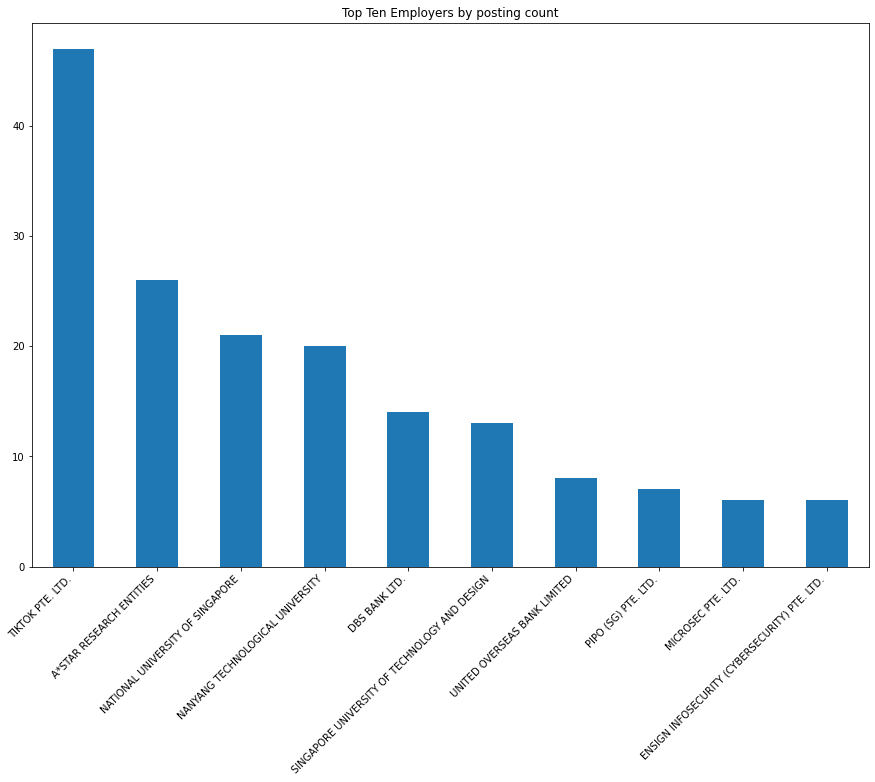

In [16]:
df.iloc[:,1].value_counts()[:10].plot(kind='bar', title='Top Ten Employers by posting count', figsize= (15,10))
plt.xticks(rotation=45, ha='right')

Lets see what are the positions offered by these companies and the average pay

In [22]:
df.groupby('salary').mean()

C:\Users\Randy\AppData\Local\Temp\ipykernel_25036\3741661099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('salary').mean()


""
salary
"$1,800to$3,000"
"$10,000to$12,000"
"$10,000to$13,000"
"$10,000to$14,000"
"$10,000to$15,000"
...
"$9,000to$18,000"
"$9,232to$10,630"
"$9,500to$18,000"
